In [11]:
# Import dependencies
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import plotly.express as px
import hvplot.pandas
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the cannabis dataset
file_path = Path("../Data/kushy_washington_cleaned.csv")
cannabis_csv_df = pd.read_csv(file_path)
print(cannabis_csv_df.shape)
cannabis_csv_df.head()

(722, 36)


,test_id,test_strain,type,ailment_1,ailment_2,ailment_3,ailment_4,ailment_5,effects_1,effects_2,...,inventory_type,chemotype,strain_leafly_page_rank,strain_leafly_review_rank,strain_tests,strain_chemotype,strain_prop_chemotype1,strain_prop_chemotype2,strain_prop_chemotype3,strain_modal_chemo_prop
0,19,Dutch Hawaiian,Sativa,Depression,Stress,Pain,Nausea,None,Happy,Energetic,...,Flower Lot,1,619,141,425,1,1.0,0.0,0.0,1.0
1,21,SleeStack,Hybrid,Stress,Depression,None,None,None,Uplifted,Euphoric,...,Flower Lot,1,1276,151,63,1,1.0,0.0,0.0,1.0
2,22,Space Needle,Sativa,Depression,Stress,None,None,None,Uplifted,Euphoric,...,Flower Lot,1,0,0,0,0,0.0,0.0,0.0,0.0
3,23,Double Purple Doja,Hybrid,Pain,Stress,Inflammation,Muscle Spasms,None,Relaxed,Creative,...,Flower Lot,1,1115,151,52,1,1.0,0.0,0.0,1.0
4,37,Jack Skellington,Hybrid,Stress,Depression,Pain,Muscle Spasms,None,Creative,Relaxed,...,Flower Lot,1,708,141,124,1,1.0,0.0,0.0,1.0


In [3]:
# Drop the non-beneficial columns test_id and test_strain
cannabis_df = cannabis_csv_df.drop(["test_id", "test_strain"], axis=1)
print(cannabis_df.shape)
cannabis_df.head()

(722, 34)


,type,ailment_1,ailment_2,ailment_3,ailment_4,ailment_5,effects_1,effects_2,effects_3,effects_4,...,inventory_type,chemotype,strain_leafly_page_rank,strain_leafly_review_rank,strain_tests,strain_chemotype,strain_prop_chemotype1,strain_prop_chemotype2,strain_prop_chemotype3,strain_modal_chemo_prop
0,Sativa,Depression,Stress,Pain,Nausea,None,Happy,Energetic,Uplifted,Euphoric,...,Flower Lot,1,619,141,425,1,1.0,0.0,0.0,1.0
1,Hybrid,Stress,Depression,None,None,None,Uplifted,Euphoric,Creative,Relaxed,...,Flower Lot,1,1276,151,63,1,1.0,0.0,0.0,1.0
2,Sativa,Depression,Stress,None,None,None,Uplifted,Euphoric,Happy,Hungry,...,Flower Lot,1,0,0,0,0,0.0,0.0,0.0,0.0
3,Hybrid,Pain,Stress,Inflammation,Muscle Spasms,None,Relaxed,Creative,Sleepy,Happy,...,Flower Lot,1,1115,151,52,1,1.0,0.0,0.0,1.0
4,Hybrid,Stress,Depression,Pain,Muscle Spasms,None,Creative,Relaxed,Euphoric,Energetic,...,Flower Lot,1,708,141,124,1,1.0,0.0,0.0,1.0


In [4]:
# Determine number of unique values in each column, specifically ailments (10) for k-means clustering (k=10)
cannabis_df.nunique()

type                           4
ailment_1                      9
ailment_2                      9
ailment_3                     10
ailment_4                     10
ailment_5                      9
effects_1                     14
effects_2                     23
effects_3                     24
effects_4                     26
effects_5                     28
effects_6                      4
effects_7                      4
effects_8                      4
flavor_1                      32
flavor_2                      50
flavor_3                      42
ailment_count                  6
effects_count                  9
flavor_count                   4
thc_max                      697
cbd_max                      207
thc_cbd                      558
cbd_thc                       48
inventory_type                 7
chemotype                      3
strain_leafly_page_rank      640
strain_leafly_review_rank    128
strain_tests                 291
strain_chemotype               4
strain_pro

In [5]:
# Check datatypes
cannabis_df.dtypes

type                          object
ailment_1                     object
ailment_2                     object
ailment_3                     object
ailment_4                     object
ailment_5                     object
effects_1                     object
effects_2                     object
effects_3                     object
effects_4                     object
effects_5                     object
effects_6                     object
effects_7                     object
effects_8                     object
flavor_1                      object
flavor_2                      object
flavor_3                      object
ailment_count                  int64
effects_count                  int64
flavor_count                   int64
thc_max                      float64
cbd_max                      float64
thc_cbd                      float64
cbd_thc                      float64
inventory_type                object
chemotype                      int64
strain_leafly_page_rank        int64
s

In [6]:
# Use get_dummies() to encode object columns
cannabis_df_encoded = pd.get_dummies(cannabis_df, columns=None)
print(cannabis_df_encoded.shape)
cannabis_df_encoded.head()

(722, 325)


,ailment_count,effects_count,flavor_count,thc_max,cbd_max,thc_cbd,cbd_thc,chemotype,strain_leafly_page_rank,strain_leafly_review_rank,...,flavor_3_Tree,flavor_3_Tropical,flavor_3_Woody,inventory_type_Bubble Hash,inventory_type_CO2 Hash Oil,inventory_type_Flower Lot,inventory_type_Food Grade Solvent Extract,inventory_type_Hash,inventory_type_Hydrocarbon Wax,inventory_type_Marijuana Mix
0,4,7,2,20.1309,0.54,37.28,0.03,1,619,141,...,0,0,0,0,0,1,0,0,0,0
1,2,7,2,9.9139,0.00,0.00,0.00,1,1276,151,...,0,0,0,0,0,1,0,0,0,0
2,2,7,1,10.8132,0.00,0.00,0.00,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,7,2,11.6702,0.00,0.00,0.00,1,1115,151,...,0,0,0,0,0,1,0,0,0,0
4,4,8,2,13.4657,0.00,0.00,0.00,1,708,141,...,0,0,0,0,0,1,0,0,0,0


In [7]:
# Check encoded columns
pd.set_option('display.max_columns', None)
cannabis_df_encoded.head()

,ailment_count,effects_count,flavor_count,thc_max,cbd_max,thc_cbd,cbd_thc,chemotype,strain_leafly_page_rank,strain_leafly_review_rank,strain_tests,strain_chemotype,strain_prop_chemotype1,strain_prop_chemotype2,strain_prop_chemotype3,strain_modal_chemo_prop,type_Hybrid,type_Indica,type_Organi,type_Sativa,ailment_1_Depression,ailment_1_Inflammation,ailment_1_Insomnia,ailment_1_Lack of Appetite,ailment_1_Muscle Spasms,ailment_1_Nausea,ailment_1_None,ailment_1_Pain,ailment_1_Stress,ailment_2_ Depression,ailment_2_ Inflammation,ailment_2_ Insomnia,ailment_2_ Lack of Appetite,ailment_2_ Muscle Spasms,ailment_2_ Nausea,ailment_2_ Pain,ailment_2_ Stress,ailment_2_None,ailment_3_ Depression,ailment_3_ Inflammation,ailment_3_ Insomnia,ailment_3_ Lack of Appetite,ailment_3_ Muscle Spasms,ailment_3_ Nausea,ailment_3_ Pain,ailment_3_ Seizures,ailment_3_ Stress,ailment_3_None,ailment_4_ Depression,ailment_4_ Inflammation,ailment_4_ Insomnia,ailment_4_ Lack of Appetite,ailment_4_ Muscle Spasms,ailment_4_ Nausea,ailment_4_ Pain,ailment_4_ Seizures,ailment_4_ Stress,ailment_4_None,ailment_5_ Depression,ailment_5_ Inflammation,ailment_5_ Insomnia,ailment_5_ Lack of Appetite,ailment_5_ Muscle Spasms,ailment_5_ Nausea,ailment_5_ Pain,ailment_5_ Stress,ailment_5_None,effects_1_Creative,effects_1_Energetic,effects_1_Euphoric,effects_1_Focused,effects_1_Giggly,effects_1_Happy,effects_1_Horny,effects_1_Hungry,effects_1_None,effects_1_Relaxed,effects_1_Sleepy,effects_1_Talkative,effects_1_Tingly,effects_1_Uplifted,effects_2_ Creative,effects_2_ Energetic,effects_2_ Euphoric,effects_2_ Focused,effects_2_ Happy,effects_2_ Horny,effects_2_ Hungry,effects_2_ Relaxed,effects_2_ Sleepy,effects_2_ Talkative,effects_2_ Tingly,effects_2_ Uplifted,effects_2_Creative,effects_2_Energetic,effects_2_Euphoric,effects_2_Focused,effects_2_Giggly,effects_2_Happy,effects_2_Hungry,effects_2_None,effects_2_Relaxed,effects_2_Sleepy,effects_2_Uplifted,effects_3_ Creative,effects_3_ Energetic,effects_3_ Euphoric,effects_3_ Focused,effects_3_ Happy,effects_3_ Horny,effects_3_ Hungry,effects_3_ Relaxed,effects_3_ Sleepy,effects_3_ Talkative,effects_3_ Tingly,effects_3_ Uplifted,effects_3_Creative,effects_3_Energetic,effects_3_Euphoric,effects_3_Focused,effects_3_Giggly,effects_3_Happy,effects_3_Hungry,effects_3_None,effects_3_Relaxed,effects_3_Talkative,effects_3_Tingly,effects_3_Uplifted,effects_4_ Creative,effects_4_ Energetic,effects_4_ Euphoric,effects_4_ Focused,effects_4_ Happy,effects_4_ Horny,effects_4_ Hungry,effects_4_ Relaxed,effects_4_ Sleepy,effects_4_ Talkative,effects_4_ Tingly,effects_4_ Uplifted,effects_4_Aroused,effects_4_Creative,effects_4_Energetic,effects_4_Euphoric,effects_4_Focused,effects_4_Giggly,effects_4_Happy,effects_4_Hungry,effects_4_None,effects_4_Relaxed,effects_4_Sleepy,effects_4_Talkative,effects_4_Tingly,effects_4_Uplifted,effects_5_ Anxious,effects_5_ Creative,effects_5_ Dry Mouth,effects_5_ Energetic,effects_5_ Euphoric,effects_5_ Focused,effects_5_ Happy,effects_5_ Horny,effects_5_ Hungry,effects_5_ Relaxed,effects_5_ Sleepy,effects_5_ Talkative,effects_5_ Tingly,effects_5_ Uplifted,effects_5_Aroused,effects_5_Creative,effects_5_Energetic,effects_5_Euphoric,effects_5_Focused,effects_5_Giggly,effects_5_Happy,effects_5_Hungry,effects_5_None,effects_5_Relaxed,effects_5_Sleepy,effects_5_Talkative,effects_5_Tingly,effects_5_Uplifted,effects_6_ Anxious,effects_6_ Dry Mouth,effects_6_ Paranoid,effects_6_None,effects_7_ Anxious,effects_7_ Dry Mouth,effects_7_ Paranoid,effects_7_None,effects_8_ Anxious,effects_8_ Dry Mouth,effects_8_ Paranoid,effects_8_None,flavor_1_Ammonia,flavor_1_Apricot,flavor_1_Berry,flavor_1_Blueberry,flavor_1_Butter,flavor_1_Cheese,flavor_1_Chemical,flavor_1_Citrus,flavor_1_Diesel,flavor_1_Earthy,flavor_1_Flowery,flavor_1_Grape,flavor_1_Honey,flavor_1_Lavender,flavor_1_Lemon,flavor_1_Lime,flavor_1_Mango,flavor_1_Menthol,flavor_1_None,flavor_1_Pepper,flavor_1_Pine,flavor_1_Pineapple,flavor_1_Pungent,flavor_1_Sage,flavor_1_Sku

In [8]:
# Check encoded datatypes
pd.set_option('display.max_rows', None)
cannabis_df_encoded.dtypes

ailment_count                                  int64
effects_count                                  int64
flavor_count                                   int64
thc_max                                      float64
cbd_max                                      float64
thc_cbd                                      float64
cbd_thc                                      float64
chemotype                                      int64
strain_leafly_page_rank                        int64
strain_leafly_review_rank                      int64
strain_tests                                   int64
strain_chemotype                               int64
strain_prop_chemotype1                       float64
strain_prop_chemotype2                       float64
strain_prop_chemotype3                       float64
strain_modal_chemo_prop                      float64
type_Hybrid                                    uint8
type_Indica                                    uint8
type_Organi                                   

In [9]:
# Standardize the data with StandardScaler()
cannabis_df_encoded_scaled = StandardScaler().fit_transform(cannabis_df_encoded)
cannabis_df_encoded_scaled

array([[ 0.57716594,  0.55991936, -0.04810139, ..., -0.05270463,
        -0.20086269, -0.05270463],
       [-0.41147892,  0.55991936, -0.04810139, ..., -0.05270463,
        -0.20086269, -0.05270463],
       [-0.41147892,  0.55991936, -1.04036433, ..., -0.05270463,
        -0.20086269, -0.05270463],
       ...,
       [ 0.57716594,  0.19173923,  0.94416155, ..., -0.05270463,
        -0.20086269, -0.05270463],
       [-1.40012377, -2.0173415 ,  0.94416155, ..., -0.05270463,
        -0.20086269, -0.05270463],
       [-1.40012377, -0.17644089,  0.94416155, ..., -0.05270463,
        -0.20086269, -0.05270463]])

In [12]:
# Using PCA to reduce dimension to three principal components
# Initialize PCA model
pca = PCA(n_components=3)

# Get thtee principal components for the data.
X_pca = pca.fit_transform(cannabis_df_encoded_scaled)
X_pca

array([[-2.73171969,  0.26272434,  4.77687443],
       [-0.7598521 ,  1.14398661,  3.22136251],
       [-0.13044458,  0.33794367,  2.52294225],
       ...,
       [-2.65920115, -0.85661909, -1.28692215],
       [ 7.83576912, -4.27871751,  0.07146546],
       [ 4.69708894,  3.04493462, -0.2955945 ]])

In [14]:
# Create a DataFrame with the three principal components
cannabis_pca_df = pd.DataFrame(data=X_pca, columns=["PC 1", "PC 2", "PC 3"], index=cannabis_df.index)
print(cannabis_pca_df.shape)
cannabis_pca_df.head(10)

(722, 3)


,PC 1,PC 2,PC 3
0,-2.731720,0.262724,4.776874
1,-0.759852,1.143987,3.221363
2,-0.130445,0.337944,2.522942
3,-2.732807,0.000584,-0.992049
4,-3.093917,0.017852,2.701616
5,-3.958106,-2.526938,-3.560328
6,4.171769,7.064276,-0.391544
7,-2.671795,0.688079,-2.229029
8,-4.575034,-2.060783,-2.887151
9,4.714223,4.045994,0.183762


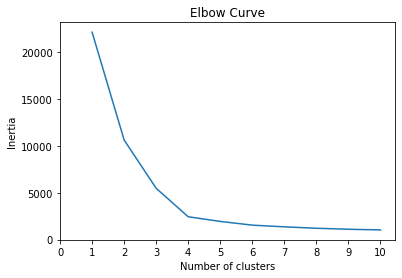

In [16]:
# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(cannabis_pca_df)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [89]:
# Predicting clusters with k=8

# Initialize the k-means model
model = KMeans(n_clusters=8, random_state=72)

# Fit the model
model.fit(cannabis_pca_df)

# Predict clusters
predictions = model.predict(cannabis_pca_df)
predictions

array([3, 3, 2, 6, 3, 0, 5, 6, 0, 7, 3, 0, 6, 3, 5, 3, 5, 6, 7, 5, 1, 3,
       1, 1, 0, 3, 3, 6, 0, 0, 3, 1, 1, 3, 1, 1, 0, 1, 1, 7, 0, 0, 0, 3,
       4, 3, 4, 5, 3, 1, 1, 0, 1, 6, 0, 0, 6, 1, 7, 5, 6, 6, 6, 0, 3, 5,
       0, 7, 0, 1, 1, 3, 4, 6, 0, 5, 3, 4, 0, 3, 1, 0, 1, 6, 3, 0, 3, 0,
       3, 3, 3, 5, 1, 1, 0, 4, 0, 4, 1, 6, 1, 0, 2, 1, 5, 0, 4, 0, 5, 5,
       0, 3, 6, 3, 1, 6, 1, 0, 5, 3, 0, 0, 1, 3, 3, 6, 3, 1, 0, 4, 0, 1,
       1, 1, 1, 3, 1, 1, 1, 6, 3, 7, 6, 6, 0, 0, 1, 3, 7, 4, 5, 4, 0, 1,
       6, 1, 5, 3, 0, 4, 0, 5, 0, 1, 0, 1, 1, 4, 1, 0, 0, 5, 0, 1, 3, 6,
       6, 1, 0, 7, 0, 3, 0, 4, 3, 3, 1, 1, 0, 6, 1, 1, 0, 0, 3, 0, 3, 0,
       0, 6, 1, 6, 3, 7, 6, 3, 7, 3, 1, 0, 0, 0, 1, 0, 0, 0, 0, 6, 0, 0,
       5, 6, 0, 3, 5, 3, 1, 6, 4, 6, 6, 6, 6, 1, 0, 0, 4, 3, 4, 4, 2, 5,
       1, 6, 4, 6, 6, 3, 5, 1, 1, 0, 5, 7, 3, 4, 6, 6, 0, 6, 0, 5, 5, 5,
       1, 0, 4, 3, 3, 5, 1, 1, 1, 0, 6, 5, 4, 1, 0, 5, 4, 6, 2, 5, 0, 6,
       0, 5, 4, 5, 6, 5, 3, 1, 4, 6, 6, 0, 6, 0, 1,

In [90]:
# Create a new DataFrame including predicted clusters and cryptocurrencies features.
# Concatentate the crypto_df and pcs_df DataFrames on the same columns.
cannabis_clustered_df = cannabis_csv_df.join(cannabis_pca_df, how='inner')

#  Add a new column, "Class" to the clustered_df DataFrame that holds the predictions.
cannabis_clustered_df["class"] = model.labels_

# Print the shape of the clustered_df
print(cannabis_clustered_df.shape)
cannabis_clustered_df.head(10)

(722, 40)


,test_id,test_strain,type,ailment_1,ailment_2,ailment_3,ailment_4,ailment_5,effects_1,effects_2,effects_3,effects_4,effects_5,effects_6,effects_7,effects_8,flavor_1,flavor_2,flavor_3,ailment_count,effects_count,flavor_count,thc_max,cbd_max,thc_cbd,cbd_thc,inventory_type,chemotype,strain_leafly_page_rank,strain_leafly_review_rank,strain_tests,strain_chemotype,strain_prop_chemotype1,strain_prop_chemotype2,strain_prop_chemotype3,strain_modal_chemo_prop,PC 1,PC 2,PC 3,class
0,19,Dutch Hawaiian,Sativa,Depression,Stress,Pain,Nausea,None,Happy,Energetic,Uplifted,Euphoric,Relaxed,Dry Mouth,Anxious,None,Citrus,Sweet,None,4,7,2,20.1309,0.54,37.28,0.03,Flower Lot,1,619,141,425,1,1.000000,0.000000,0.000000,1.000000,-2.731720,0.262724,4.776874,3
1,21,SleeStack,Hybrid,Stress,Depression,None,None,None,Uplifted,Euphoric,Creative,Relaxed,Talkative,Anxious,Dry Mouth,None,Sweet,Pine,None,2,7,2,9.9139,0.00,0.00,0.00,Flower Lot,1,1276,151,63,1,1.000000,0.000000,0.000000,1.000000,-0.759852,1.143987,3.221363,3
2,22,Space Needle,Sativa,Depression,Stress,None,None,None,Uplifted,Euphoric,Happy,Hungry,Relaxed,Dry Mouth,Anxious,None,Pine,None,None,2,7,1,10.8132,0.00,0.00,0.00,Flower Lot,1,0,0,0,0,0.000000,0.000000,0.000000,0.000000,-0.130445,0.337944,2.522942,2
3,23,Double Purple Doja,Hybrid,Pain,Stress,Inflammation,Muscle Spasms,None,Relaxed,Creative,Sleepy,Happy,Euphoric,Dry Mouth,Anxious,None,Earthy,Grape,None,4,7,2,11.6702,0.00,0.00,0.00,Flower Lot,1,1115,151,52,1,1.000000,0.000000,0.000000,1.000000,-2.732807,0.000584,-0.992049,6
4,37,Jack Skellington,Hybrid,Stress,Depression,Pain,Muscle Spasms,None,Creative,Relaxed,Euphoric,Energetic,Happy,Dry Mouth,Paranoid,Anxious,Citrus,Sweet,None,4,8,2,13.4657,0.00,0.00,0.00,Flower Lot,1,708,141,124,1,1.000000,0.000000,0.000000,1.000000,-3.093917,0.017852,2.701616,3
5,38,Northern Lights,Hybrid,Stress,Pain,Insomnia,Depression,Lack of Appetite,Relaxed,Sleepy,Happy,Euphoric,Hungry,Dry Mouth,Anxious,Paranoid,Earthy,Pine,Sweet,5,8,3,12.0579,0.00,0.00,0.00,Flower Lot,1,11,11,1389,1,0.987761,0.011519,0.000720,0.987761,-3.958106,-2.526938,-3.560328,0
6,42,Qleaner,Hybrid,None,None,None,None,None,Uplifted,Energetic,Happy,Euphoric,Creative,None,None,None,None,None,None,0,5,0,13.2919,0.00,0.00,0.00,Flower Lot,1,1377,150,61,1,1.000000,0.000000,0.000000,1.000000,4.171769,7.064276,-0.391544,5
7,43,Qush,Hybrid,Stress,Pain,Depression,Insomnia,Lack of Appetite,Relaxed,Sleepy,Uplifted,Happy,Euphoric,Dry Mouth,None,None,Citrus,None,None,5,6,1,10.3016,0.00,0.00,0.00,Flower Lot,1,1594,151,17,1,1.000000,0.000000,0.000000,1.000000,-2.671795,0.688079,-2.229029,6
8,52,Afgoo,Indica,Stress,Pain,Insomnia,Lack of Appetite,Muscle Spasms,Relaxed,Sleepy,Happy,Euphoric,Hungry,Dry Mouth,Paranoid,Anxious,Pine,Earthy,Citrus,5,8,3,12.5149,0.00,0.00,0.00,Flower Lot,1,196,116,795,1,0.996226,0.003774,0.000000,0.996226,-4.575034,-2.060783,-2.887151,0
9,57,Pineapple,Hybrid,None,None,None,None,None,Happy,Uplifted,Euphoric,Relaxed,Energetic,None,None,None,Earthy,Grape,Berry,0,5,3,14.4689,0.00,0.00,0.00,Flower Lot,1,143,93,502,1,0.996016,0.000000,0.003984,0.996016,4.714223,4.045994,0.183762,7


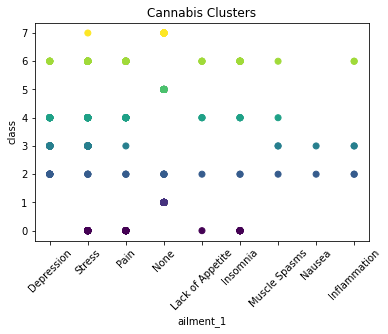

In [91]:
# Visualize the clusters
plt.scatter(x=cannabis_clustered_df['ailment_1'], y=cannabis_clustered_df["class"], c=cannabis_clustered_df['class'])
plt.xlabel('ailment_1')
plt.ylabel('class')
plt.xticks(rotation = 45)
plt.title('Cannabis Clusters')
plt.show()

In [92]:
# Visualize the clusters
cannabis_clustered_df.hvplot.scatter(x="ailment_1", y="class", by="class", rot=45)

:NdOverlay   [class]
   :Scatter   [ailment_1]   (class)

In [93]:
# Creating a 3D-Scatter with the PCA data and the clusters
fig = px.scatter_3d(
    cannabis_clustered_df,
    x="PC 1",
    y="PC 2",
    z="PC 3",
    color="class",
    symbol="class",
    hover_name="test_strain",
    hover_data=["type", "ailment_1"],
    width=800,
)

fig.update_layout(legend=dict(x=0, y=1))
fig.show()